# Madrid Air Quality

Die folgenden Daten müssen von kaggle.com kopiert, entpackt und dann in Databricks geladen werden:
- air-quality-madrid.zip                   151 MB
- weather_madrid_LEMD_1997_2015.csv.zip    148 KB

## Analysieren der Wetter Daten von Madrid der Jahre 1997 - 2015

Read weather information from CSV file for years 1997 to 2015 on a daily basis:

In [5]:
weather = sqlContext.read.format("com.databricks.spark.csv")\
.option("header","true")\
.option("inferSchema","true")\
.load("/FileStore/tables/Madrid/weather_madrid_LEMD_1997_2015.csv")
weather.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [6]:
weather.count()

Out[ 2 ]: 6812

In [7]:
weather.show()

+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
 CET|Max TemperatureC|Mean TemperatureC|Min TemperatureC|Dew PointC|MeanDew PointC|Min DewpointC|Max Humidity| Mean Humidity| Min Humidity| Max Sea Level PressurehPa| Mean Sea Level PressurehPa| Min Sea Level PressurehPa| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM| Max Wind SpeedKm/h| Mean Wind SpeedKm/h| Max Gust SpeedKm/h|Precipitationmm| CloudCover| Events|WindDirDegrees|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
1997-01-01 00:00:00| 7| 4| 2| 5| 3| 2| 100| 95| 76| 1010| 1008| 1004| 10| 9| 4| 13| 6| null| 0.0| 6| null| 229|
1997-01-02 00:00:00| 7| 3| 0| 6| 3| 0| 100| 92| 71| 1007| 1003| 997| 10| 9| 4| 26| 8| 47| 0.0| 5| Rain| 143|
1997-01-03 00:00:00| 5| 3| 2| 5| 1| -1| 100| 85| 70| 1005| 999| 996| 10| 10| 7| 27| 19| null| 0.0| 6|Rain-Snow| 256|
1997-01-04 00:00:00| 7| 3| -1| -2| -3| -4| 86| 63| 49| 1012| 1010| 1005| 10| 10| 10| 27| 19| 40| 0.0| 2| null| 284|
1997-01-05 00:00:00| 2| 0| -1| 2| 0| -3| 100| 95| 86| 1012| 1008| 1005| 10| 5| 1| 14| 6| null| 0.0| 7| Snow| 2|
1997-01-06 00:00:00| 7| 3| 1| 2| -1| -3| 100| 82| 57| 1014| 1010| 1008| 10| 10| 10| 11| 5| null| 0.0| 4| null| 64|
1997-01-07 00:00:00| 2| 0| -2| 1| -1| -3| 100| 93| 75| 1016| 1014| 1009| 10| 7| 0| 6| 2| null| 0.0| 7| Snow| 43|
1997-01-08 00:00:00| 8| 4| 1| 7| 4| 1| 100| 96| 87| 1015| 1005| 1003| 10| 8| 4| 26| 8| null| 0.0| 7| Rain| 273|
1997-01-09 00:00:00| 12| 10| 8| 8| 3| 0| 100| 65| 44| 1015| 1008| 1003| 10| 10| 10| 48| 23| 48| 0.0| 4| Rain| 274|
1997-01-10 00:00:00| 13| 8| 3| 8| 5| 1| 93| 83| 63| 1021| 1018| 1016| 10| 10| 10| 13| 5| null| 0.0| 5| null| 100|
1997-01-11 00:00:00| 16| 10| 5| 10| 7| 5| 100| 90| 67| 1024| 1022| 1021| 10| 6| 0| 11| 2| null| 0.0| 3| Fog| 344|
1997-01-12 00:00:00| 17| 10| 3| 8| 6| 3| 100| 84| 55| 1024| 1022| 1020| 10| 10| 10| 14| 8| null| 0.0| 1| null| 345|
1997-01-13 00:00:00| 15| 9| 4| 9| 4| -1| 100| 75| 38| 1022| 1021| 1019| 10| 9| 3| 11| 2| null| 0.0| 4| Fog| 128|
1997-01-14 00:00:00| 11| 6| 0| 4| 2| 0| 100| 81| 50| 1022| 1020| 1019| 10| 9| 1| 14| 2| null| 0.0| 4| null| 35|
1997-01-15 00:00:00| 11| 8| 5| 7| 5| 4| 100| 83| 62| 1021| 1019| 1018| 10| 10| 8| 10| 3| null| 0.0| 6| Rain| 16|
1997-01-16 00:00:00| 12| 9| 6| 8| 7| 6| 100| 89| 72| 1019| 1017| 1015| 10| 10| 10| 24| 5| null| 0.0| 6| null| 63|
1997-01-17 00:00:00| 13| 9| 5| 9| 5| 1| 100| 78| 47| 1022| 1018| 1015| 10| 10| 7| 27| 13| null| 0.0| 4| Rain| 267|
1997-01-18 00:00:00| 6| 3| 2| 6| 4| 2| 100| 98| 93| 1022| 1019| 1015| 10| 7| 3| 8| 2| null| 0.0| 6| Rain| 357|
1997-01-19 00:00:00| 9| 7| 6| 7| 6| 5| 100| 97| 87| 1015| 1011| 1004| 10| 6| 2| 14| 8| null| 0.0| 4| Rain| 99|
1997-01-20 00:00:00| 9| 7| 5| 9| 7| 5| 100| 100| 100| 1008| 1005| 1003| 10| 8| 3| 13| 5| null| 0.0| 5| Rain| 320|
+-------------------+----------------+-----------------+----------------+----------+--------------+-------------+------------+--------------+-------------+--------------------------+---------------------------+--------------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+---------------+-----------+---------+--------------+
only showing top 20 rows

In [8]:
weather.registerTempTable("weatherT")
res1 = sqlContext.sql("SELECT CET, `Max TemperatureC`, `Min TemperatureC`, `Mean TemperatureC` FROM weatherT")
res1.show()

+-------------------+----------------+----------------+-----------------+
 CET|Max TemperatureC|Min TemperatureC|Mean TemperatureC|
+-------------------+----------------+----------------+-----------------+
1997-01-01 00:00:00| 7| 2| 4|
1997-01-02 00:00:00| 7| 0| 3|
1997-01-03 00:00:00| 5| 2| 3|
1997-01-04 00:00:00| 7| -1| 3|
1997-01-05 00:00:00| 2| -1| 0|
1997-01-06 00:00:00| 7| 1| 3|
1997-01-07 00:00:00| 2| -2| 0|
1997-01-08 00:00:00| 8| 1| 4|
1997-01-09 00:00:00| 12| 8| 10|
1997-01-10 00:00:00| 13| 3| 8|
1997-01-11 00:00:00| 16| 5| 10|
1997-01-12 00:00:00| 17| 3| 10|
1997-01-13 00:00:00| 15| 4| 9|
1997-01-14 00:00:00| 11| 0| 6|
1997-01-15 00:00:00| 11| 5| 8|
1997-01-16 00:00:00| 12| 6| 9|
1997-01-17 00:00:00| 13| 5| 9|
1997-01-18 00:00:00| 6| 2| 3|
1997-01-19 00:00:00| 9| 6| 7|
1997-01-20 00:00:00| 9| 5| 7|
+-------------------+----------------+----------------+-----------------+
only showing top 20 rows

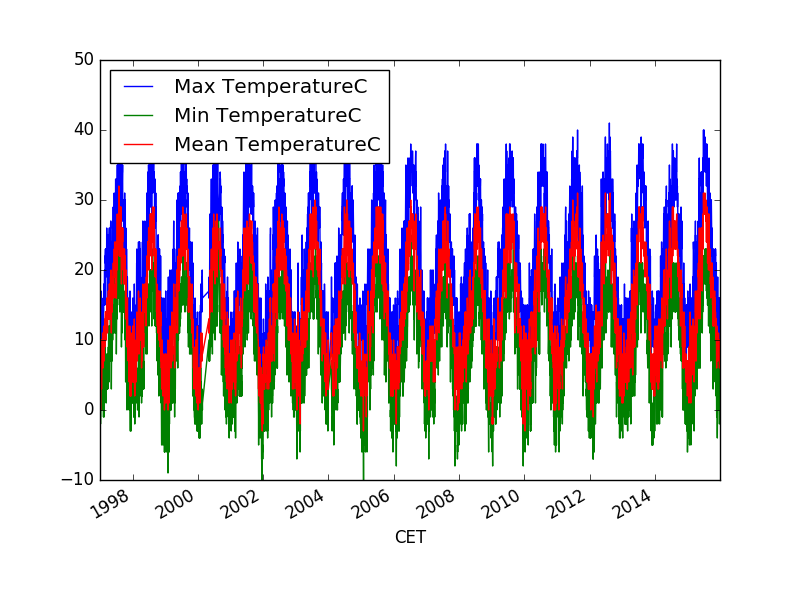

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res1.toPandas()
pdDF.plot(x='CET', y='Max TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Min TemperatureC', ax=ax)
pdDF.plot(x='CET', y='Mean TemperatureC', ax=ax)
display()

In [10]:
res2 = sqlContext.sql("SELECT CET, ` Max VisibilityKm`, ` Mean VisibilityKm`, ` Min VisibilitykM` FROM weatherT")
res2.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)

In [11]:
res2.show()

+-------------------+-----------------+------------------+-----------------+
 CET| Max VisibilityKm| Mean VisibilityKm| Min VisibilitykM|
+-------------------+-----------------+------------------+-----------------+
1997-01-01 00:00:00| 10| 9| 4|
1997-01-02 00:00:00| 10| 9| 4|
1997-01-03 00:00:00| 10| 10| 7|
1997-01-04 00:00:00| 10| 10| 10|
1997-01-05 00:00:00| 10| 5| 1|
1997-01-06 00:00:00| 10| 10| 10|
1997-01-07 00:00:00| 10| 7| 0|
1997-01-08 00:00:00| 10| 8| 4|
1997-01-09 00:00:00| 10| 10| 10|
1997-01-10 00:00:00| 10| 10| 10|
1997-01-11 00:00:00| 10| 6| 0|
1997-01-12 00:00:00| 10| 10| 10|
1997-01-13 00:00:00| 10| 9| 3|
1997-01-14 00:00:00| 10| 9| 1|
1997-01-15 00:00:00| 10| 10| 8|
1997-01-16 00:00:00| 10| 10| 10|
1997-01-17 00:00:00| 10| 10| 7|
1997-01-18 00:00:00| 10| 7| 3|
1997-01-19 00:00:00| 10| 6| 2|
1997-01-20 00:00:00| 10| 8| 3|
+-------------------+-----------------+------------------+-----------------+
only showing top 20 rows

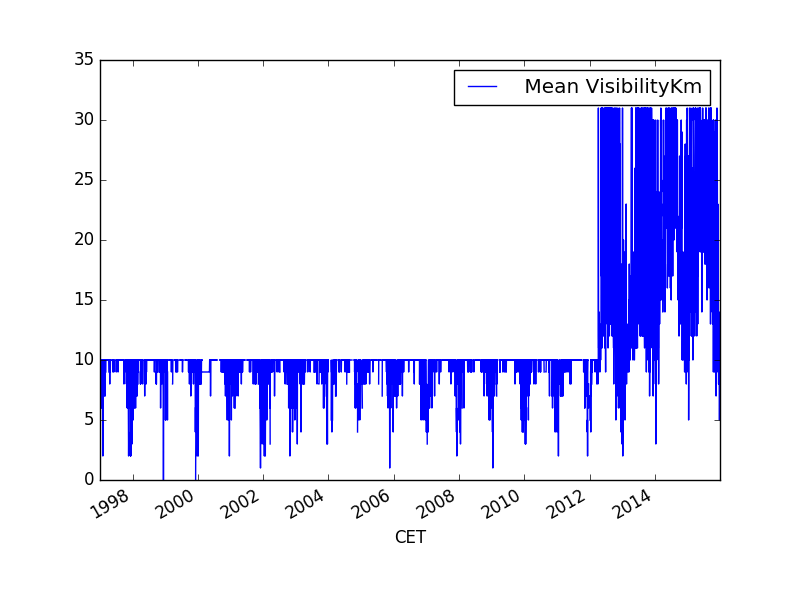

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
ax = plt.gca()
pdDF = res2.toPandas()
#pdDF.plot(x='CET', y=' Max VisibilityKm', ax=ax)
#pdDF.plot(x='CET', y=' Min VisibilitykM', ax=ax)
pdDF.plot(x='CET', y=' Mean VisibilityKm', ax=ax)
display()

## Analysieren der Daten der Luftqualität von Madrid

## Messstationen

Einlesen der Daten der Messstationen aus CSV-File:

In [16]:
stations = sqlContext.read.format("com.databricks.spark.csv")\
.option("header","true")\
.option("inferSchema","true")\
.load("/FileStore/tables/Madrid/stations.csv")
stations.registerTempTable("stationsT")

In [17]:
stationsRes = sqlContext.sql("SELECT * FROM stationsT")
stationsRes.show()

+--------+--------------------+--------------------+-------------------+------------------+---------+
 id| name| address| lon| lat|elevation|
+--------+--------------------+--------------------+-------------------+------------------+---------+
28079004| Pza. de España| Plaza de España| -3.712247222222224|40.423852777777775| 635|
28079008| Escuelas Aguirre|Entre C/ Alcalá y...| -3.682319444444445| 40.42156388888888| 670|
28079011| Avda. Ramón y Cajal|Avda. Ramón y Caj...|-3.6773555555555553| 40.451475| 708|
28079016| Arturo Soria|C/ Arturo Soria ...|-3.6392333333333333| 40.44004722222222| 693|
28079017| Villaverde| C/. Juan Peñalver| -3.713322222222221|40.347138888888885| 604|
28079018| Farolillo|Calle Farolillo -...|-3.7318527777777777| 40.39478055555556| 630|
28079024| Casa de Campo|Casa de Campo (T...|-3.7473472222222224| 40.41935555555556| 642|
28079027| Barajas Pueblo|C/. Júpiter, 21 (...| -3.580030555555555| 40.47692777777778| 621|
28079035| Pza. del Carmen|Plaza del Carmen ...|-3.7031722222222223| 40.41920833333333| 659|
28079036| Moratalaz|Avd. Moratalaz e...|-3.6453055555555554| 40.40794722222222| 685|
28079038| Cuatro Caminos|Avda. Pablo Igles...|-3.7071277777777785| 40.44554444444445| 698|
28079039| Barrio del Pilar|Avd. Betanzos esq...|-3.7115416666666654| 40.47822777777778| 674|
28079040| Vallecas|C/ Arroyo del Oli...|-3.6515222222222223| 40.38815277777777| 677|
28079047| Mendez Alvaro|C/ Juan de Marian...| -3.686825|40.398113888888886| 599|
28079048| Castellana|C/ Jose Gutierrez...| -3.690366666666667| 40.43989722222222| 676|
28079049| Parque del Retiro|Paseo Venezuela- ...| -3.682583333333333|40.414444444444435| 662|
28079050| Plaza Castilla|Plaza Castilla (C...| -3.688769444444445| 40.46557222222223| 728|
28079054|Ensanche de Vallecas|Avda La Gavia / A...| -3.612116666666666|40.372933333333336| 627|
28079055| Urb. Embajada| C/ Riaño (Barajas) |-3.5807472222222216| 40.46253055555556| 618|
28079056|Pza. Fernández La...| Pza. Fernández L...|-3.7187277777777785| 40.38496388888889| 604|
+--------+--------------------+--------------------+-------------------+------------------+---------+
only showing top 20 rows

In [18]:
stationsRes.count()

Out[ 12 ]: 24

## Luftqualitäten pro Jahr

Einlesen der Daten der Luftqualitäten pro Jahr aus CSV-Files:

In [21]:
air_2001 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2001.csv")
air_2002 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2002.csv")
air_2003 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2003.csv")
air_2004 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2004.csv")
air_2005 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2005.csv")
air_2006 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2006.csv")
air_2007 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2007.csv")
air_2008 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2008.csv")
air_2009 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2009.csv")
air_2010 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2010.csv")
air_2011 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2011.csv")
air_2012 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2012.csv")
air_2013 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2013.csv")
air_2014 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2014.csv")
air_2015 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2015.csv")
air_2016 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2016.csv")
air_2017 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2017.csv")
air_2018 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2018.csv")


Daten von 2001 ansehen:

In [23]:
air_2001.registerTempTable("air_2001T")

In [24]:
res2001 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T")
res2001.show()

+-------------------+-------------------+------------------+--------+
 date| CO| NO_2| station|
+-------------------+-------------------+------------------+--------+
2001-08-01 01:00:00| 0.3700000047683716|58.400001525878906|28079001|
2001-08-01 01:00:00| 0.3400000035762787| 56.25|28079035|
2001-08-01 01:00:00| 0.2800000011920929| 50.65999984741211|28079003|
2001-08-01 01:00:00| 0.4699999988079071| 69.79000091552734|28079004|
2001-08-01 01:00:00|0.38999998569488525|22.829999923706055|28079039|
2001-08-01 01:00:00| 0.6299999952316284| 66.26000213623047|28079006|
2001-08-01 01:00:00| 0.2800000011920929| 35.79999923706055|28079007|
2001-08-01 01:00:00| 0.6700000166893005| 74.83000183105469|28079009|
2001-08-01 01:00:00| 0.4099999964237213|33.209999084472656|28079038|
2001-08-01 01:00:00|0.17000000178813934| 24.1299991607666|28079011|
2001-08-01 01:00:00| 0.3799999952316284|40.900001525878906|28079012|
2001-08-01 01:00:00|0.17000000178813934| 30.6299991607666|28079040|
2001-08-01 01:00:00|0.18000000715255737|30.920000076293945|28079014|
2001-08-01 01:00:00|0.23999999463558197|33.869998931884766|28079015|
2001-08-01 01:00:00| 0.25|13.970000267028809|28079016|
2001-08-01 01:00:00|0.17000000178813934|28.979999542236328|28079018|
2001-08-01 01:00:00|0.25999999046325684| 44.77000045776367|28079019|
2001-08-01 01:00:00|0.28999999165534973| 34.06999969482422|28079036|
2001-08-01 01:00:00|0.33000001311302185|43.209999084472656|28079021|
2001-08-01 01:00:00| 0.8100000023841858| 53.47999954223633|28079022|
+-------------------+-------------------+------------------+--------+
only showing top 20 rows

In [25]:
res2001.count()

Out[ 16 ]: 217872

Daten von 2001 der Station 28079007 darstellen:

In [27]:
res2001S007 = sqlContext.sql("SELECT date, CO, NO_2, station FROM air_2001T WHERE station=28079007")
pdDF = res2001S007.toPandas()

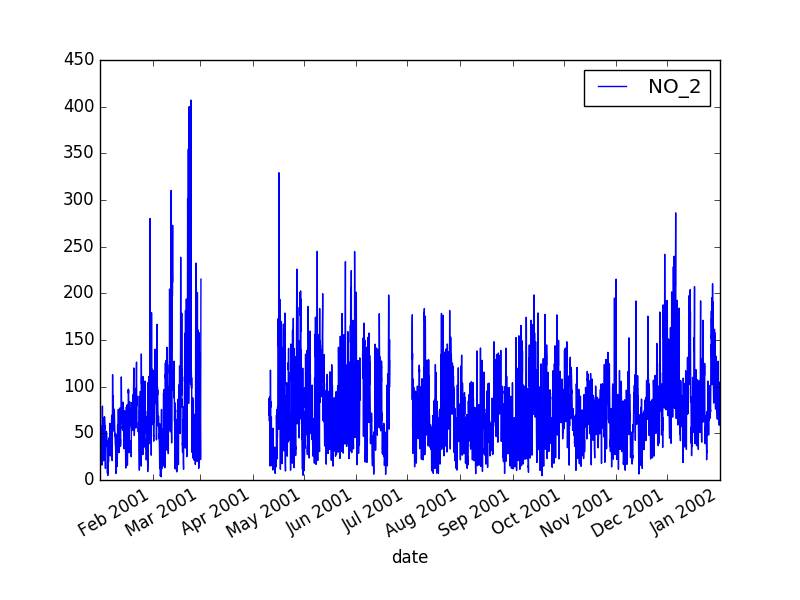

In [28]:
plt.clf()
ax = plt.gca()
#pdDF.plot(x='date', y='CO', ax=ax)
pdDF.plot(x='date', y='NO_2', ax=ax)
display()

Vereinigung der Jahres-Datentabellen zu einem File.
Dabei werden/müssen einzelne Kolonnen angepasst bzw. entfernt werden.

In [30]:
air_df1 = air_2001.unionByName(air_2002).unionAll(air_2003)
air_df2 = air_2004.unionByName(air_2005).unionAll(air_2006).unionAll(air_2007).unionAll(air_2008).unionAll(air_2009).unionAll(air_2010)
air_df3 = air_2011.unionByName(air_2012).unionAll(air_2013).unionAll(air_2014).unionAll(air_2015).unionAll(air_2016)
air_df4 = air_2017.unionByName(air_2018)
air_df1.printSchema()
air_df2.printSchema()
air_df3.printSchema()
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CH4: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [31]:
common_columns = list(set(air_df1.columns).intersection(air_df2.columns).intersection(air_df3.columns).intersection(air_df4.columns))
print(common_columns)

['EBE', 'CO', 'O_3', 'NO_2', 'SO_2', 'TOL', 'NMHC', 'station', 'PM10', 'TCH', 'date', 'BEN']

Reduce each of the four dataframes to the common attributes

In [33]:
for column in list(set(air_df1.columns) - set(common_columns)):
  air_df1 = air_df1.drop(column)
air_df1.printSchema()
for column in list(set(air_df2.columns) - set(common_columns)):
  air_df2 = air_df2.drop(column)
air_df2.printSchema()
for column in list(set(air_df3.columns) - set(common_columns)):
  air_df3 = air_df3.drop(column)
air_df3.printSchema()
for column in list(set(air_df4.columns) - set(common_columns)):
  air_df4 = air_df4.drop(column)
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

now combine to one dataframe

In [35]:
air_df = air_df1.unionByName(air_df2).unionByName(air_df3).unionByName(air_df4)
air_df.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

Anzahl der Messreihen ausgeben:

In [37]:
air_df.count()

Out[ 23 ]: 3808224

In [38]:
# helper method to allow normalization of dates by "deleting" hours and minutes, i.e. reducing to day information
import datetime
from pyspark import sql

def replace_date (zeile):
  datum = zeile["date"]
  z = zeile.asDict()
  z['date'] = datum.replace(hour=0, minute=0)
  return sql.types.Row(**z)
  
  
#test_row = sql.Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001)
#print(test_row)
#print(replace_date(test_row))

In [39]:
airRDD = air_df.rdd
airRDD.take(3)

Out[ 25 ]: 
[Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, station=28079035),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, station=28079003)]

In [40]:
# normalize all timestamps to day only, i.e. overwrite hour and minute by 0
airRDD_new = airRDD.map(lambda x: replace_date(x))
airRDD_new.take(3)

Out[ 26 ]: 
[Row(BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079001),
 Row(BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079035),
 Row(BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079003)]

In [41]:
# convert back to dataframe
air_df_new = spark.createDataFrame(airRDD_new)
air_df_new.createOrReplaceTempView("airRDD_new")
air_df_new.count()

Out[ 27 ]: 3808224

In [42]:
#potential duplicates created by date normalization to be deleted. Check with count whether there were some!
air_df_new = air_df_new.dropDuplicates()
air_df_new.count()
# 3'808'224 vs 3'774'422, d.h. es wurden Duplikate produziert.

Out[ 28 ]: 3774422

In [43]:
air_df_new.registerTempTable("airT")

res3 = sqlContext.sql("SELECT count(airT.NO_2) FROM weatherT, airT WHERE weatherT.CET = airT.date")
res3.show()

+-----------+
count(NO_2)|
+-----------+
 3264534|
+-----------+

In [44]:
res4 = sqlContext.sql("SELECT count(*) FROM airT")
res4.show()

+--------+
count(1)|
+--------+
 3774422|
+--------+

CSV-File schreiben mit allen Messreihen:

In [46]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018", True)
#air_df.repartition(1).write.csv("/FileStore/tables/Madrid/madrid_2001-2018", sep=",",header = 'true')
air_df_new.write.csv("/FileStore/tables/Madrid/madrid_2001-2018.csv", sep=",",header = 'true')

In [47]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.csv

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_committed_7963699211675083095,_committed_7963699211675083095,17624
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_started_7963699211675083095,_started_7963699211675083095,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00000-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1469-c000.csv,part-00000-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1469-c000.csv,2468224
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00001-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1470-c000.csv,part-00001-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1470-c000.csv,2437328
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00002-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1471-c000.csv,part-00002-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1471-c000.csv,2485687
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00003-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1472-c000.csv,part-00003-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1472-c000.csv,2520354
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00004-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1473-c000.csv,part-00004-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1473-c000.csv,2456647
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00005-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1474-c000.csv,part-00005-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1474-c000.csv,2447786
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00006-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1475-c000.csv,part-00006-tid-7963699211675083095-a764df2b-e6a1-4c7b-a3d7-6747d7a52056-1475-c000.csv,2462284


Parquet-File mit allen Messreihen schreiben:

In [49]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018.parquet", True)
air_df_new.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [50]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.parquet

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_committed_1730258560863314371,_committed_1730258560863314371,19824
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_started_1730258560863314371,_started_1730258560863314371,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00000-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1780-c000.snappy.parquet,part-00000-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1780-c000.snappy.parquet,377983
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00001-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1781-c000.snappy.parquet,part-00001-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1781-c000.snappy.parquet,376310
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00002-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1782-c000.snappy.parquet,part-00002-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1782-c000.snappy.parquet,380192
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00003-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1783-c000.snappy.parquet,part-00003-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1783-c000.snappy.parquet,384162
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00004-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1784-c000.snappy.parquet,part-00004-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1784-c000.snappy.parquet,377895
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00005-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1785-c000.snappy.parquet,part-00005-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1785-c000.snappy.parquet,377382
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00006-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1786-c000.snappy.parquet,part-00006-tid-1730258560863314371-89210d23-e236-49e8-9874-76bc910af15d-1786-c000.snappy.parquet,378771


Plots über die ganze Zeit:

In [52]:
air_df2 = spark.read.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [53]:
air_df2.registerTempTable("airT")
fullData = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL FROM airT WHERE station=28079036")
fullData.show()

+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
 date| BEN| CO| EBE|NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
2001-08-04 00:00:00|null|0.12999999523162842|null|null|27.639999389648438| 33.18000030517578|14.050000190734863| 7.760000228881836|null|null|
2001-08-04 00:00:00|null| 0.2199999988079071|null|null|26.399999618530273| 50.0|21.489999771118164| 8.449999809265137|null|null|
2001-08-23 00:00:00|null| 0.5099999904632568|null|null| 103.4000015258789|30.969999313354492| 77.66999816894531| 14.3100004196167|null|null|
2001-08-23 00:00:00|null| 2.0999999046325684|null|null| 120.9000015258789| 9.930000305175781| 84.12999725341797| 14.90999984741211|null|null|
2001-08-28 00:00:00|null|0.28999999165534973|null|null| 37.0|63.439998626708984| 53.70000076293945| 9.300000190734863|null|null|
2001-08-30 00:00:00|null|0.44999998807907104|null|null| 56.75| 57.7400016784668| 35.43000030517578| 8.75|null|null|
2001-10-22 00:00:00|null| 0.4099999964237213|null|null|45.689998626708984| 40.70000076293945|21.600000381469727| 7.070000171661377|null|null|
2001-09-03 00:00:00|null| 0.5|null|null|52.220001220703125| 59.38999938964844|51.029998779296875| 6.849999904632568|null|null|
2001-09-04 00:00:00|null| 0.7099999785423279|null|null|105.69999694824219|13.789999961853027| 59.59000015258789| 8.680000305175781|null|null|
2001-09-06 00:00:00|null| 0.3499999940395355|null|null| 46.09000015258789| 78.7300033569336| 52.29999923706055| 8.989999771118164|null|null|
2001-09-23 00:00:00|null| 0.2199999988079071|null|null|20.489999771118164|52.459999084472656| 6.960000038146973| 5.329999923706055|null|null|
2001-09-29 00:00:00|null| 1.100000023841858|null|null| 60.08000183105469| 10.3100004196167| 50.88999938964844| 9.0|null|null|
2001-07-02 00:00:00|null| 0.5699999928474426|null|null|103.80000305175781|35.689998626708984| 41.15999984741211|10.420000076293945|null|null|
2001-07-10 00:00:00|null|0.12999999523162842|null|null|20.030000686645508|43.380001068115234| 7.96999979019165| 7.550000190734863|null|null|
2001-07-10 00:00:00|null| 0.3499999940395355|null|null|47.869998931884766| 11.8100004196167|18.610000610351562| 8.210000038146973|null|null|
2001-07-12 00:00:00|null| 0.1899999976158142|null|null|45.880001068115234|31.950000762939453| 24.06999969482422| 8.40999984741211|null|null|
2001-07-18 00:00:00|null| 0.25|null|null|28.809999465942383| 53.31999969482422|25.350000381469727| 6.849999904632568|null|null|
2001-07-31 00:00:00|null| 0.3100000023841858|null|null|38.970001220703125| 58.68000030517578|58.279998779296875| 9.680000305175781|null|null|
2001-04-02 00:00:00|null| 0.7599999904632568|null|null| 113.4000015258789| 9.329999923706055|28.670000076293945|15.649999618530273|null|null|
2001-04-11 00:00:00|null|0.23999999463558197|null|null|26.889999389648438| 82.5| 50.2599983215332| 7.849999904632568|null|null|
+-------------------+----+-------------------+----+----+------------------+------------------+------------------+------------------+----+----+
only showing top 20 rows

In [54]:
fullDF = fullData.toPandas()

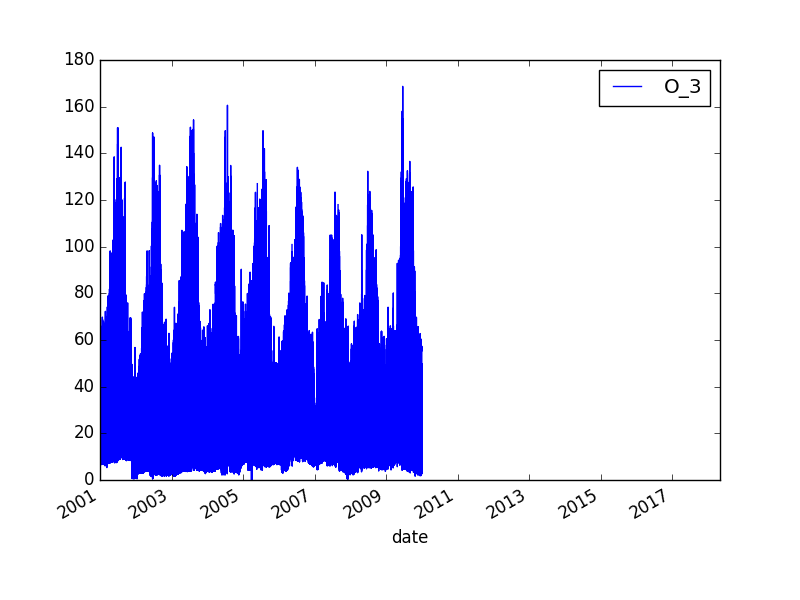

In [55]:
plt.clf()
ax = plt.gca()
fullDF.plot(x='date', y='O_3', ax=ax)
display()

In [56]:
fullData2 = sqlContext.sql("SELECT date, BEN, CO, EBE, NMHC, NO_2, O_3, PM10, SO_2, TCH, TOL, station FROM airT")
fullData2.show()

+-------------------+------------------+-------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
 date| BEN| CO| EBE| NMHC| NO_2| O_3| PM10| SO_2| TCH| TOL| station|
+-------------------+------------------+-------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------+
2001-08-01 00:00:00| null| 0.3100000023841858| null| null| 71.0999984741211| 37.43000030517578|29.270000457763672| 6.760000228881836| null| null|28079004|
2001-08-02 00:00:00| null|0.07999999821186066| null| 0.05999999865889549|26.420000076293945| 70.52999877929688| 42.90999984741211|3.2799999713897705|1.2100000381469727| null|28079040|
2001-08-02 00:00:00|1.2599999904632568| 0.800000011920929| null| null|25.489999771118164| 90.81999969482422| 39.61000061035156| 7.880000114440918| null| 7.03000020980835|28079022|
2001-08-02 00:00:00| null| 0.5099999904632568| null| null|53.630001068115234| 76.93000030517578|31.979999542236328| 6.559999942779541| null| null|28079003|
2001-08-03 00:00:00|0.6499999761581421|0.20999999344348907| 0.550000011920929| 0.07000000029802322| 9.529999732971191|63.529998779296875|17.030000686645508| 8.90999984741211|1.2899999618530273|1.7100000381469727|28079024|
2001-08-03 00:00:00| null|0.28999999165534973| null| null| 67.13999938964844| 71.97000122070312| 8.109999656677246| 3.809999942779541| null| null|28079019|
2001-08-03 00:00:00| null|0.41999998688697815| null| 0.1599999964237213|40.880001068115234|36.630001068115234|16.540000915527344| 2.990000009536743|1.2799999713897705| null|28079040|
2001-08-04 00:00:00| null| 0.9399999976158142| null| null|56.130001068115234|23.549999237060547|28.420000076293945| 9.300000190734863| null| null|28079014|
2001-08-04 00:00:00| null|0.12999999523162842| null| null|27.639999389648438| 33.18000030517578|14.050000190734863| 7.760000228881836| null| null|28079036|
2001-08-04 00:00:00| null| 0.2199999988079071| null| null|26.399999618530273| 50.0|21.489999771118164| 8.449999809265137| null| null|28079036|
2001-08-05 00:00:00| null| 0.2199999988079071| null| 0.17000000178813934|33.189998626708984| 89.36000061035156|15.069999694824219| 5.019999980926514|1.4600000381469727| null|28079011|
2001-08-06 00:00:00|1.1200000047683716|0.27000001072883606|0.9700000286102295| null| 77.75| 18.31999969482422| null| 32.02000045776367| null| 5.019999980926514|28079025|
2001-08-06 00:00:00| null| 1.0| null| 0.27000001072883606| 96.4000015258789| 4.199999809265137| 70.55999755859375| 42.02000045776367| 1.590000033378601| null|28079023|
2001-08-06 00:00:00| null| 0.4399999976158142| null| 0.23000000417232513| 66.93000030517578| 71.88999938964844|11.430000305175781| 7.619999885559082|1.5299999713897705| null|28079011|
2001-08-06 00:00:00|0.9800000190734863| 0.5400000214576721|0.7200000286102295| 0.10000000149011612|16.110000610351562| 127.9000015258789| 21.3799991607666|11.529999732971191|1.2899999618530273| 3.559999942779541|28079024|
2001-08-06 00:00:00|1.2000000476837158| 0.25|0.9399999976158142| null|33.689998626708984| 124.0| null| 29.90999984741211| null| 5.550000190734863|28079025|
2001-08-07 00:00:00| 7.940000057220459| 1.4199999570846558| null| null| 105.0999984741211| 6.650000095367432| 74.72000122070312| 28.18000030517578| null|43.150001525878906|28079022|
2001-08-08 00:00:00| null|0.41999998688697815| null|0.019999999552965164| 27.06999969482422| 40.16999816894531|48.029998779296875|16.510000228881836|1.2599999904632568| null|28079012|
2001-08-08 00:00:00|0.3400000035762787| 0.6800000071525574| null| null|20.420000076293945| 69.91999816894531| 7.539999961853027| 7.619999885559082| null|1.4600000381469727|28079022|
2001-08-09 00:00:00| null| 0.4000000059604645| null| null| 72.70999908447266|21.100000381469727|10.640000343322754| 7.590000152587891| null| null|28079003|
+---

In [57]:
plt.clf()
ax = plt.gca()
fullDF2 = fullData2.toPandas()

In [58]:
obiger Befehl dauert sehr, sehr lange! 15 Minuten.

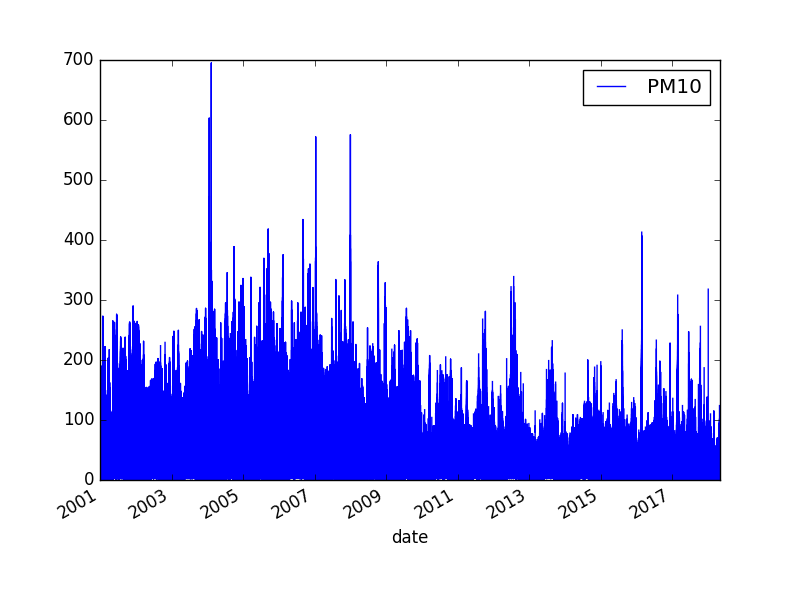

In [59]:
fullDF2.plot(x='date', y='PM10')
display()

Anpassen des Zeitstempel-Formats:

In [61]:
air_df_pd = air_df.toPandas()
air_df_pd["red_datetime"] = [air_df_pd["date"][i].replace(hour = 0, minute = 0) for i in range(len(air_df_pd))]
air_df_pd.head(2)

Out[ 40 ]: 
 date BEN CO EBE NMHC NO_2 O_3 \
0 2001-08-01 01:00:00 NaN 0.37 NaN NaN 58.400002 34.529999 
1 2001-08-01 01:00:00 1.5 0.34 1.49 0.07 56.250000 42.160000 

 PM10 SO_2 TCH TOL station red_datetime 
0 105.000000 6.34 NaN NaN 28079001 2001-08-01 
1 100.599998 8.11 1.24 10.82 28079035 2001-08-01

In [62]:
obiger Befehl dauert sehr, sehr lange! 20 Minuten.

In [63]:
from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)
air_df_enhanced = sqlCtx.createDataFrame(air_df_pd)

Anpassen der Werte durch Berechnung des Durchschnitts:

In [65]:
air_df_enhanced.registerTempTable("airT_enh")
time_gas_con = sqlContext.sql("SELECT red_datetime, station, AVG(BEN) AS BEN, AVG(CO) AS CO, AVG(EBE) AS EBE, AVG(NMHC) AS NMHC, AVG(NO_2) AS NO_2, AVG(O_3) AS O_3, AVG(PM10) AS PM10, AVG(SO_2) AS SO_2, AVG(TCH) AS TCH, AVG(TOL) AS TOL FROM airT_enh GROUP BY red_datetime, station")

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2324545519616515> in <module> () 
 ----> 1 air_df_enhanced . registerTempTable ( "airT_enh" ) 
 2 time_gas_con = sqlContext . sql ( "SELECT red_datetime, station, AVG(BEN) AS BEN, AVG(CO) AS CO, AVG(EBE) AS EBE, AVG(NMHC) AS NMHC, AVG(NO_2) AS NO_2, AVG(O_3) AS O_3, AVG(PM10) AS PM10, AVG(SO_2) AS SO_2, AVG(TCH) AS TCH, AVG(TOL) AS TOL FROM airT_enh GROUP BY red_datetime, station" ) 

 NameError : name 'air_df_enhanced' is not defined

In [66]:
time_gas_con.take(10)

Darstellung der Anzahl Messreihen:

In [68]:
print(time_gas_con.count())

Ausgabe der neuen Tabelle in Parquet-File:

In [70]:
time_gas_con.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018_time_gas_concentration.parquet")

## Grafik mit gemittelten Daten

In [72]:
air_df_grouped = air_df_new.groupBy('date').agg({'CO': 'mean', 'EBE': 'mean', 'NMHC': 'mean', 'TCH': 'mean', 'SO_2': 'mean', 'O_3': 'mean',
                                                'TOL': 'mean', 'BEN': 'mean', 'PM10': 'mean', 'NO_2': 'mean'})

In [73]:
air_df_grouped.take(3)

Out[ 42 ]: 
[Row(date=datetime.datetime(2001, 8, 15, 0, 0), avg(NO_2)=47.45773553718691, avg(NMHC)=0.16761363669524365, avg(BEN)=1.6765714230281965, avg(CO)=0.4479347833439006, avg(TCH)=1.4323484834396478, avg(O_3)=44.45786232123341, avg(EBE)=2.695916660875082, avg(TOL)=14.774855033643004, avg(SO_2)=8.069112306703692, avg(PM10)=39.42563407144685),
 Row(date=datetime.datetime(2001, 8, 16, 0, 0), avg(NO_2)=42.48502666446286, avg(NMHC)=0.13253787871817072, avg(BEN)=1.303612905740738, avg(CO)=0.4393605682237957, avg(TCH)=1.3308712054382672, avg(O_3)=46.6926156755444, avg(EBE)=1.6902290054860005, avg(TOL)=9.278355259252223, avg(SO_2)=7.3341030228624975, avg(PM10)=24.78427538405294),
 Row(date=datetime.datetime(2001, 9, 4, 0, 0), avg(NO_2)=72.68015808296539, avg(NMHC)=0.21118773921068143, avg(BEN)=2.470595236601574, avg(CO)=0.6744639710154915, avg(TCH)=1.4133333355987665, avg(O_3)=40.08383127423707, avg(EBE)=2.5884027832912073, avg(TOL)=16.519638518253004, avg(SO_2)=10.85391915661589, avg(PM10)=49.89976059929442)]

In [74]:
air_df_grouped.cache()

Out[ 43 ]: DataFrame[date: timestamp, avg(NO_2): double, avg(NMHC): double, avg(BEN): double, avg(CO): double, avg(TCH): double, avg(O_3): double, avg(EBE): double, avg(TOL): double, avg(SO_2): double, avg(PM10): double]

In [75]:
air_df_grouped.registerTempTable("airGroupedT")
res5 = sqlContext.sql("SELECT count(*) FROM airGroupedT")
res5.show()

+--------+
count(1)|
+--------+
 6330|
+--------+

In [76]:
air_df_grouped.count()

Out[ 45 ]: 6330

alles zu Pandas:

In [78]:
pd_air_df_grouped = air_df_grouped.toPandas()

### CO-Plot:

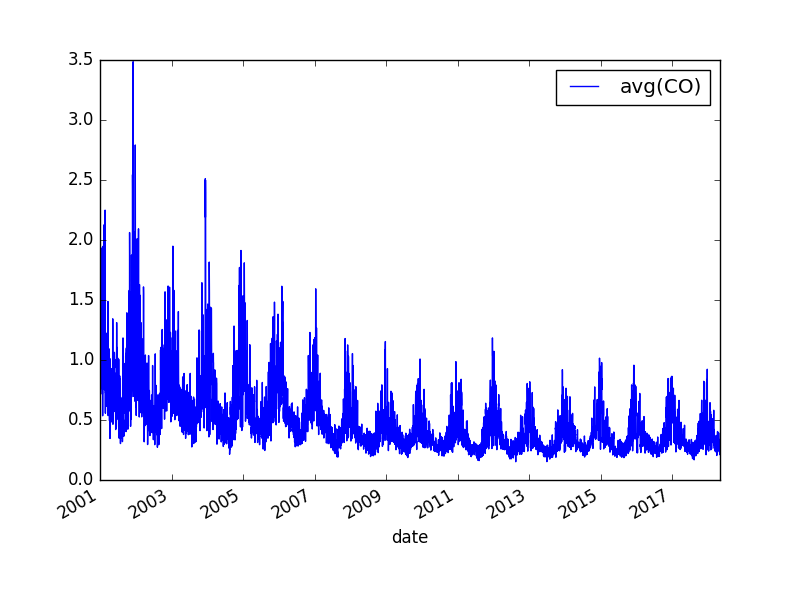

In [80]:
pd_air_df_grouped.plot(x='date', y='avg(CO)')
display()

### O_3 Plot:

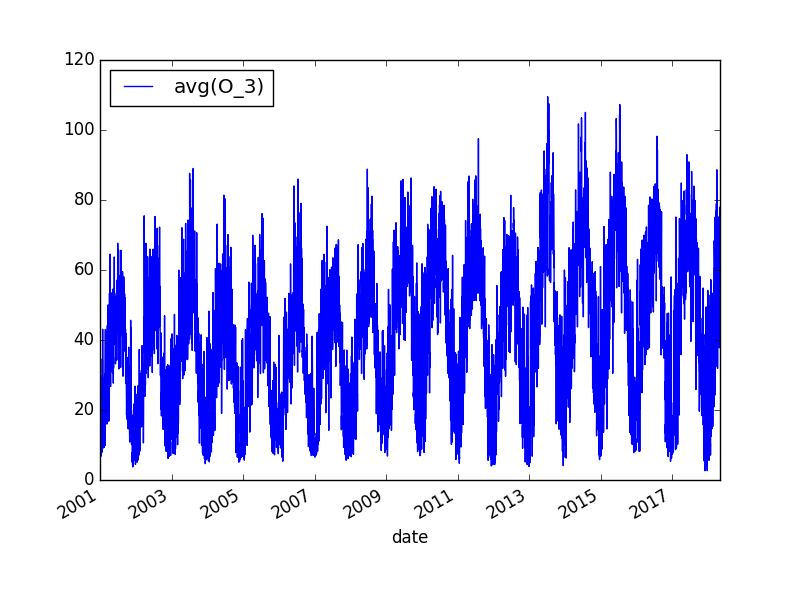

In [82]:
pd_air_df_grouped.plot(x='date', y='avg(O_3)')
display()

### NO_2 Plot:

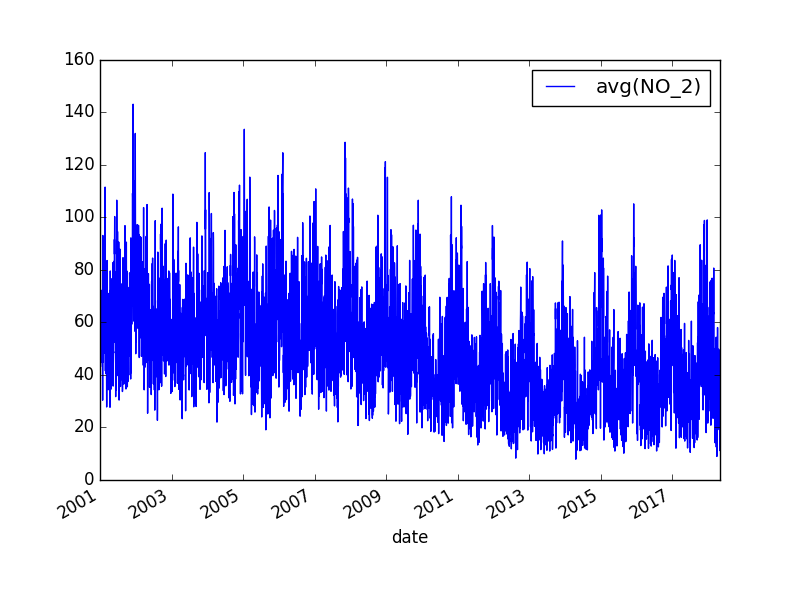

In [84]:
pd_air_df_grouped.plot(x='date', y='avg(NO_2)')
display()

### SO_2 Plot

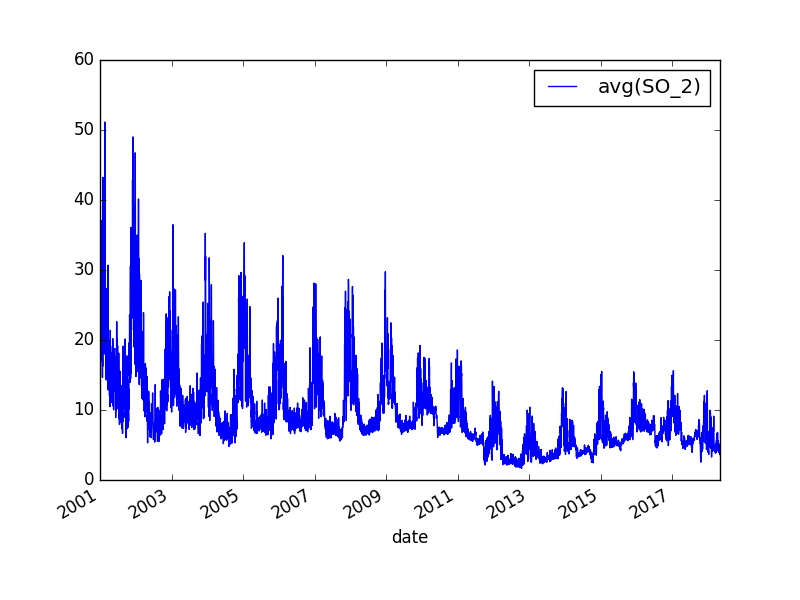

In [86]:
pd_air_df_grouped.plot(x='date', y='avg(SO_2)')
display()

In [87]:
### PM10 Plot

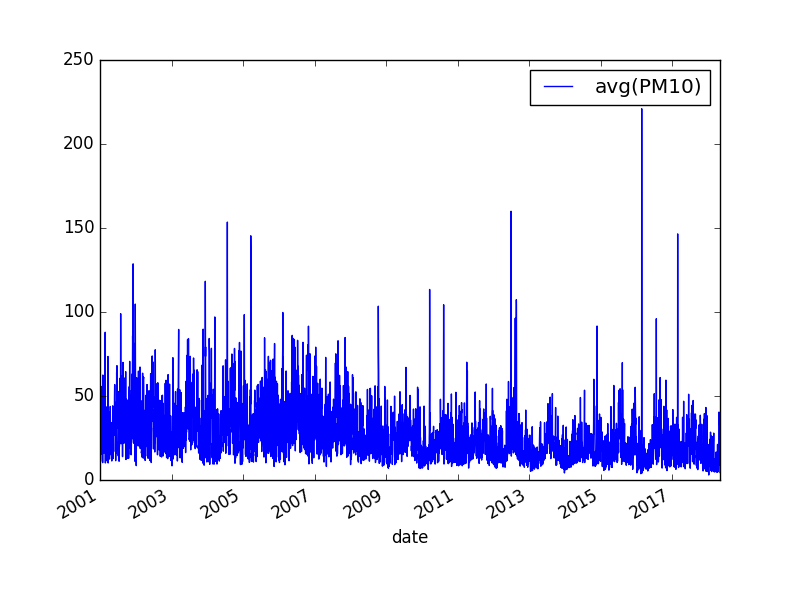

In [88]:
pd_air_df_grouped.plot(x='date', y='avg(PM10)')
display()

In [89]:
### avg(NMHC)

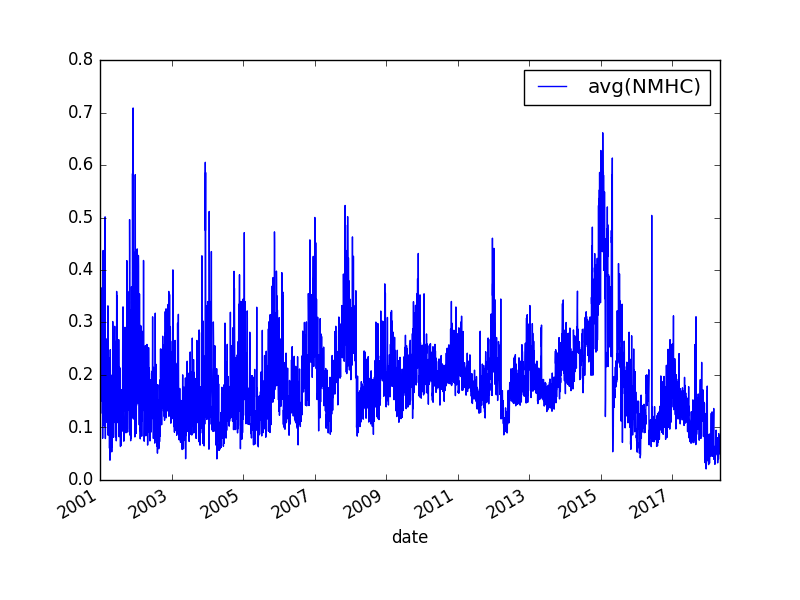

In [90]:
pd_air_df_grouped.plot(x='date', y='avg(NMHC)')
display()

## Join mit Wetterdaten

In [92]:
air = air_df_grouped.alias("air")
w = weather.alias("w")
air_weather_joined_by_date = air.join(w, air.date == w.CET, 'inner')

In [93]:
air_weather_joined_by_date.count() 

Out[ 54 ]: 5448

In [94]:
air_weather_joined_by_date.printSchema()

root
-- date: timestamp (nullable = true)
-- avg(NO_2): double (nullable = true)
-- avg(NMHC): double (nullable = true)
-- avg(BEN): double (nullable = true)
-- avg(CO): double (nullable = true)
-- avg(TCH): double (nullable = true)
-- avg(O_3): double (nullable = true)
-- avg(EBE): double (nullable = true)
-- avg(TOL): double (nullable = true)
-- avg(SO_2): double (nullable = true)
-- avg(PM10): double (nullable = true)
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [95]:
air_weather_joined_by_date.take(3)

Out[ 57 ]: 
[Row(date=datetime.datetime(2001, 8, 15, 0, 0), avg(NO_2)=47.45773553718691, avg(NMHC)=0.16761363669524365, avg(BEN)=1.6765714230281965, avg(CO)=0.4479347833439006, avg(TCH)=1.4323484834396478, avg(O_3)=44.45786232123341, avg(EBE)=2.695916660875082, avg(TOL)=14.774855033643004, avg(SO_2)=8.069112306703692, avg(PM10)=39.42563407144685, CET=datetime.datetime(2001, 8, 15, 0, 0), Max TemperatureC=30, Mean TemperatureC=24, Min TemperatureC=19, Dew PointC=17, MeanDew PointC=11, Min DewpointC=4, Max Humidity=83, Mean Humidity=44, Min Humidity=19, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1015, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=5, Events=u'Rain', WindDirDegrees=263),
 Row(date=datetime.datetime(2001, 8, 16, 0, 0), avg(NO_2)=42.48502666446286, avg(NMHC)=0.13253787871817072, avg(BEN)=1.303612905740738, avg(CO)=0.4393605682237957, avg(TCH)=1.3308712054382672, avg(O_3)=46.6926156755444, avg(EBE)=1.6902290054860005, avg(TOL)=9.278355259252223, avg(SO_2)=7.3341030228624975, avg(PM10)=24.78427538405294, CET=datetime.datetime(2001, 8, 16, 0, 0), Max TemperatureC=29, Mean TemperatureC=23, Min TemperatureC=18, Dew PointC=11, MeanDew PointC=6, Min DewpointC=-2, Max Humidity=56, Mean Humidity=32, Min Humidity=13, Max Sea Level PressurehPa=1020, Mean Sea Level PressurehPa=1018, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=24, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=3, Events=None, WindDirDegrees=260),
 Row(date=datetime.datetime(2001, 9, 4, 0, 0), avg(NO_2)=72.68015808296539, avg(NMHC)=0.21118773921068143, avg(BEN)=2.470595236601574, avg(CO)=0.6744639710154915, avg(TCH)=1.4133333355987665, avg(O_3)=40.08383127423707, avg(EBE)=2.5884027832912073, avg(TOL)=16.519638518253004, avg(SO_2)=10.85391915661589, avg(PM10)=49.89976059929442, CET=datetime.datetime(2001, 9, 4, 0, 0), Max TemperatureC=32, Mean TemperatureC=23, Min TemperatureC=15, Dew PointC=15, MeanDew PointC=12, Min DewpointC=10, Max Humidity=88, Mean Humidity=55, Min Humidity=27, Max Sea Level PressurehPa=1019, Mean Sea Level PressurehPa=1017, Min Sea Level PressurehPa=1016, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=10, Max Wind SpeedKm/h=21, Mean Wind SpeedKm/h=6, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=2, Events=None, WindDirDegrees=341)]